In [1]:
import pandas as pd

In [42]:
df = pd.read_csv('out/dataL1K/df_noisy_out_language_dp_rho=2.65.csv')
df.head()

,Unnamed: 0,SUMLVL,LEVEL,S203_GEOID,AIAN,ANRC,ST,CNTY,MCD,NAMELSAD,...,pred_flag5,pred_flag10,pred_flagedu,pred_leppct,pred_cov,noisy_leppct,noisy_illit,noisy_geopop,noisy_vaclep,noisy_coverage
0,9,50,County,0500000US02016,0,0,2,16,NNNNN,Aleutians West Census Area,...,True,False,True,5.3,True,5.2603,11.044,3380.344,177.847,True
1,11,50,County,0500000US02050,0,0,2,50,NNNNN,Bethel Census Area,...,True,False,True,13.5,True,13.5237,162.157,11529.655,1559.240,True
2,13,50,County,0500000US02060,0,0,2,60,NNNNN,Bristol Bay Borough,...,False,False,False,0.4,False,1.0909,6.002,682.132,7.540,False
3,15,50,County,0500000US02070,0,0,2,70,NNNNN,Dillingham Census Area,...,True,False,True,6.9,True,6.9257,53.768,3393.233,235.051,True
4,17,50,County,0500000US02122,0,0,2,122,NNNNN,Kenai Peninsula Borough,...,False,False,True,0.0,False,0.0317,6.793,44499.933,17.351,False


In [43]:
(df['FLAG_COV'] == 1.0) == df['noisy_coverage']

0       True
1       True
2      False
3       True
4      False
       ...  
291     True
292     True
293     True
294     True
295     True
Length: 296, dtype: bool

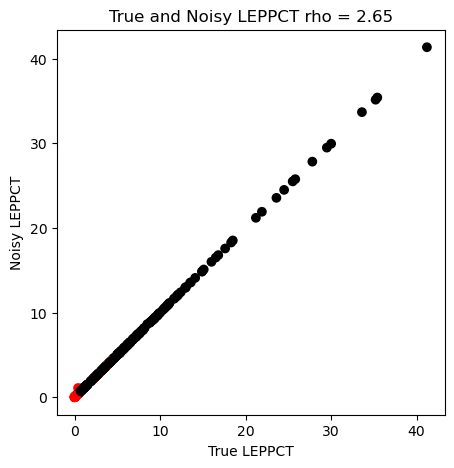

In [44]:
# plot true and noisy LEPPCT
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

# scatter df['LEPPCT'] vs df['noisy_leppct_perc'] and color each point
# if df['LEPPCT'] > 0.05 and df['noisy_leppct_perc'] > 0.05, color it black
# if df['LEPPCT'] > 0.05 and df['noisy_leppct_perc'] < 0.05, color it red, label it 'false negative'
# if df['LEPPCT'] < 0.05 and df['noisy_leppct_perc'] > 0.05, color it blue, label it 'false positive'
# if df['LEPPCT'] < 0.05 and df['noisy_leppct_perc'] < 0.05, color it green, label it 'true negative'


# combine the two above into one for loop
colors = []
labels = []

for i in range(df['LEPPCT'].size):
    if df['FLAG_COV'][i] and df['noisy_coverage'][i]:
        colors.append('black')
        labels.append('true positive')
    elif df['FLAG_COV'][i] and not df['noisy_coverage'][i]:
        colors.append('red')
        labels.append('false negative')
    elif not df['FLAG_COV'][i] and df['noisy_coverage'][i]:
        colors.append('gray')
        labels.append('false positive')
    elif not df['FLAG_COV'][i] and not df['noisy_coverage'][i]:
        colors.append('blue')
        labels.append('true negative')

# plot the scatter plot
plt.scatter(df['LEPPCT'], df['noisy_leppct'], c=colors, label=labels)

# make limits on both axis (0, 100)


plt.title('True and Noisy LEPPCT rho = 2.65')
plt.xlabel('True LEPPCT')
plt.ylabel('Noisy LEPPCT')

# show legend for unique labels
# plt.legend(

plt.show()
